

```
# # BERT IMPLEMENTATION
```



In [41]:
import pickle
from google.colab import drive

drive.mount("/content/drive")

drive_path = '/content/drive/My Drive/Model/'

# Deserialize the data structures from a file in your Google Drive
with open(drive_path + 'BERT_df_train_dev_test_data', 'rb') as file:
    df_train, df_dev, df_test = pickle.load(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install tensorflow==2.14


In [3]:
%pip install simpletransformers
from simpletransformers.classification import ClassificationModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.1 MB/s et

In [4]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset

In [37]:
## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve

In [42]:
df_train.columns

Index(['Body', 'Created At', 'Entities', 'Number of Likes', 'User', 'stock',
       'date', 'time', 'Sentiment_Score', 'Sentiment',
       'normalized_Sentiment_score', 'label'],
      dtype='object')

In [49]:
# Make a new DataFrame with just the text and label columns
train_Bert_df = df_train[['Body', 'label']]

# for testing purpose to make sure code works
#train_Bert_df = df_train[['Body', 'label']].iloc[:100]

train_Bert_texts  = train_Bert_df['Body'].values.tolist()
train_Bert_labels = train_Bert_df['label'].values.tolist()

The next few steps is to train the BERT model using pretrain model from pre-exisiting tensor dataset trained on wiki pages, youtube etc. It is then applied on our dataset

- It takes [] hours to train
- saves model in the drive

In [ ]:
# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())

In [ ]:
#!pip install tensorflow==2.14


In [51]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

In [50]:
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert',num_labels=df_train['label'].nunique(), ignore_mismatched_sizes=True)
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Only for model training, don't run otherwise -- > Load the BERT tokenizer and model
#tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=df_train['label'].nunique())



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
# Only for model training, don't run otherwise -- ># Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Encode the labels
le = LabelEncoder()
train_Bert_df['encoded_labels'] = le.fit_transform(train_Bert_df['label'])


# Ensure all data in 'Body' is a string and not empty
train_Bert_df['Body'] = train_Bert_df['Body'].astype(str)  # Convert to string in case there are non-string types
train_Bert_df = train_Bert_df[train_Bert_df['Body'].str.strip().ne('')]  # Remove any rows with empty strings

<ipython-input-54-8d89a94e91a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Bert_df['encoded_labels'] = le.fit_transform(train_Bert_df['label'])
<ipython-input-54-8d89a94e91a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Bert_df['Body'] = train_Bert_df['Body'].astype(str)  # Convert to string in case there are non-string types


In [55]:
## Only for model training, don't run otherwise -- > Tokenize the text data
### takes c.10min

encoded_data_train = tokenizer.batch_encode_plus(
    train_Bert_df['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=128
)


In [56]:
# Only for model training, don't run otherwise -- >
input_ids_train = torch.tensor(encoded_data_train['input_ids'])
attention_masks_train = torch.tensor(encoded_data_train['attention_mask'])
labels_train = torch.tensor(train_Bert_df['encoded_labels'].values)

In [57]:
# Only for model training, don't run otherwise -- >
from torch.utils.data import TensorDataset
from torch.utils.data import RandomSampler

# Create a DataLoader
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=32)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [58]:
# Only for model training, don't run otherwise -- > IMPORTANT FUNCTION, takes 5.0hours
# Training loop
num_epochs = 3
model.train()
for epoch in range(num_epochs):
    for batch in dataloader_train:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0]
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

# Only for model training, don't run otherwise -- > save to drive
model.save_pretrained("/content/drive/My Drive/Model/")


In [59]:
### LOAD MODEL FROM HERE
###Step 1
from torch.utils.data import SequentialSampler
# Load the trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("/content/drive/My Drive/Model/")
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')

# Use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [60]:
### Step 2
# Encode the labels
le = LabelEncoder()
df_test['encoded_labels'] = le.fit_transform(df_test['label'])

# Ensure all data in 'Body' is a string and not empty
df_test['Body'] = df_test['Body'].astype(str)  # Convert to string in case there are non-string types
df_test = df_test[df_test['Body'].str.strip().ne('')]  # Remove any rows with empty strings

# Tokenize the text data
encoded_data_test = tokenizer.batch_encode_plus(
    df_test['Body'].tolist(),
    truncation=True,
    padding=True,
    max_length=128
)

input_ids_test = torch.tensor(encoded_data_test['input_ids'])
attention_masks_test = torch.tensor(encoded_data_test['attention_mask'])
labels_test = torch.tensor(df_test['encoded_labels'].values)



In [61]:
### Step 3
# Create a DataLoader
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataloader_test = DataLoader(dataset_test, sampler=SequentialSampler(dataset_test), batch_size=32)

# Evaluation mode
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [62]:
#### Step 4, to do the prediction

# Variable to store predictions

import numpy as np

predictions = []

# Predict on test data
for batch in dataloader_test:
    batch = tuple(b.to(device) for b in batch)

    inputs = {'input_ids': batch[0],
              'attention_mask': batch[1],
              'labels': batch[2]}

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[1]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)

predictions = np.concatenate(predictions, axis=0)

# Convert logits to predicted class
preds = np.argmax(predictions, axis=1)

In [63]:
predictions

array([[-2.463098 , -2.4407349,  8.554804 , -1.2785472, -1.683093 ],
       [-1.4376608, -2.5861173,  7.5611224, -1.9508954, -1.1401793],
       [-3.3665586, -1.9512676, -0.515432 ,  7.812836 , -1.4399555],
       ...,
       [ 2.2976053,  5.3860564, -1.9072312, -1.1782823, -3.481594 ],
       [-2.3773699, -2.3637652,  8.587667 , -1.3849187, -1.7051268],
       [ 7.5578556, -1.8612657, -2.1567698, -2.7680047, -1.3867294]],
      dtype=float32)

In [64]:
y = df_test['label'].tolist()

accuracy_score(y, preds)

0.9655642294842433

In [65]:
print(classification_report(y, preds, digits=3))

              precision    recall  f1-score   support

           0      0.979     0.953     0.966     24540
           1      0.939     0.963     0.951     24182
           2      0.986     0.979     0.982     24368
           3      0.963     0.952     0.958     24422
           4      0.962     0.981     0.972     24309

    accuracy                          0.966    121821
   macro avg      0.966     0.966     0.966    121821
weighted avg      0.966     0.966     0.966    121821



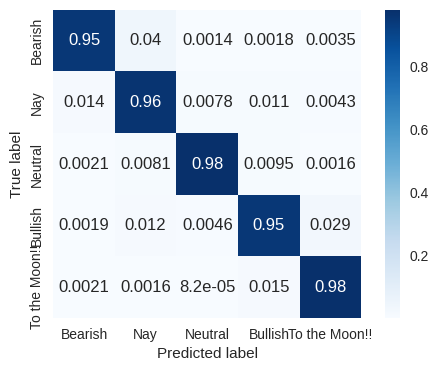

In [69]:
### Step 5: Analysis and evaluation
# Confusion Matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(y, preds, normalize='true'), range(5), range(5))

labels = ["Bearish", "Nay", "Neutral", "Bullish", "To the Moon!!"]

model_name = "FinBERT_base"
plt.figure(figsize=(6,4))
ax = sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, square=True)
ax.set_xticklabels(labels)  # Set x-axis labels
ax.set_yticklabels(labels)  # Set y-axis labels
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Save the plot
#plt.savefig(model_name + "_" + label.lower() + ".eps")

plt.show()

In [71]:
### testing the model

new_sentence = "Great share. to buy APPL. Tops!"
tokenized_sentence = tokenizer.encode(new_sentence, add_special_tokens=True)
input_ids = torch.tensor([tokenized_sentence]).to(device)
with torch.no_grad(): he
    outputs = model(input_ids)

predictions = torch.nn.functional.softmax(outputs[0], dim=-1)
predicted_class = torch.argmax(predictions).item()

print(predicted_class)

4


In [79]:
### testing the model

new_sentence = "APPL shares sucks. will not bet on it"
tokenized_sentence = tokenizer.encode(new_sentence, add_special_tokens=True)
input_ids = torch.tensor([tokenized_sentence]).to(device)
with torch.no_grad():
    outputs = model(input_ids)

predictions = torch.nn.functional.softmax(outputs[0], dim=-1)
predicted_class = torch.argmax(predictions).item()

print(predicted_class)

1


In [1]:
path="/content/drive/MyDrive/output3.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

NameError: ignored